# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [65]:
# your answer here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import pearsonr, spearmanr

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [2]:
# your answer here
employee = pd.read_csv('Employee.csv')

#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [4]:
# Method 1
# your answer here
employee.head()
employee.groupby(['Title']).agg({'Salary':'mean'})

,Salary
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


In [6]:
# Method 2
# your answer here
employee.pivot_table(index= ['Title'], values = ['Salary'], aggfunc = ['mean'])

,mean
,Salary
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [9]:
# your answer here
employee.pivot_table(index= ['Department','Title'], values = ['Salary'], aggfunc = ['mean'])

mean      
                     Salary Years
Department Title                 
HR         VP          70.0   8.0
           analyst     32.5   3.0
IT         VP          70.0   8.0
           analyst     32.5   1.5
           associate   60.0   7.0
Sales      associate   55.0   2.5

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [10]:
# your answer here
employee.pivot_table(index= ['Department','Title'], values = ['Salary','Years'], aggfunc = ['mean'])

mean      
                     Salary Years
Department Title                 
HR         VP          70.0   8.0
           analyst     32.5   3.0
IT         VP          70.0   8.0
           analyst     32.5   1.5
           associate   60.0   7.0
Sales      associate   55.0   2.5

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [12]:
# your answer here
employee.pivot_table(index= ['Department','Title'], values = ['Salary','Name'], aggfunc = {'Salary':'mean','Name':'count'})

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [21]:
# your answer here
employee1 = employee.pivot_table(index=['Department', 'Title'], values='Salary', aggfunc={'Salary': [np.median, np.min, np.max, np.std]})
                         

#### Based on your comments, fill the missing values with an appropriate value.

In [23]:
# your answer here
employee1.fillna("0", inplace=True)
employee1

amax  amin  median       std
Department Title                                  
HR         VP           70    70    70.0         0
           analyst      35    30    32.5  3.535534
IT         VP           70    70    70.0         0
           analyst      35    30    32.5  3.535534
           associate    60    60    60.0         0
Sales      associate    55    55    55.0       0.0

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [24]:
# your answer here
employee.pivot_table(index= ['Department','Title'], values = ['Salary','Name'], aggfunc = {'Salary':'mean','Name':'count'})

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [29]:
# your answer here
employee.pivot_table(index= ['Department','Title'], values = ['Salary','Years'], aggfunc = ['mean','sum'])

mean          sum      
                     Salary Years Salary Years
Department Title                              
HR         VP          70.0   8.0     70     8
           analyst     32.5   3.0     65     6
IT         VP          70.0   8.0     70     8
           analyst     32.5   1.5     65     3
           associate   60.0   7.0     60     7
Sales      associate   55.0   2.5    110     5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [ ]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [30]:
# your answer here
fitbit = pd.read_csv('Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [32]:
# your answer here
print(fitbit.dtypes)

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object


In [35]:
# your answer here
print(fitbit.describe())
fitbit

       Calorie burned         Steps    Distance      Floors  \
count      367.000000    367.000000  367.000000  367.000000   
mean      2741.501362  10121.588556    8.549128   11.724796   
std        916.307036   5594.836225    3.409881   10.337370   
min        179.000000      0.000000    0.000000    0.000000   
25%       2698.000000   6730.500000    6.155000    5.000000   
50%       2974.000000  10413.000000    8.290000   11.000000   
75%       3233.000000  13916.500000   10.560000   16.000000   
max       4351.000000  26444.000000   20.450000  101.000000   

       Minutes Sedentary  Minutes Lightly Active  Minutes Fairly Active  \
count         367.000000              367.000000             367.000000   
mean          563.934482              236.405995              26.163488   
std           294.793145               86.531376              20.319456   
min             1.002000                0.000000               0.000000   
25%           520.000000              179.000000         

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [39]:
# your answer here
corr = fitbit['Minutes Fairly Active'].corr(fitbit['Steps'])
corr

0.30324447337037475

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

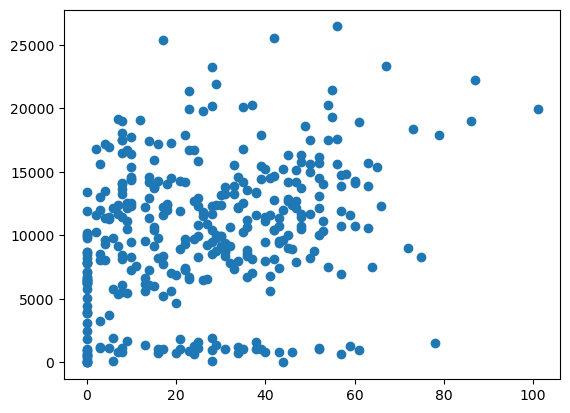

In [42]:
# your answer here
plt.scatter(fitbit['Minutes Fairly Active'], fitbit['Steps'])

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# your answer here


#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [43]:
# your answer here
corr = fitbit['Minutes Sedentary'].corr(fitbit['Steps'])
corr

0.07690608062990091

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

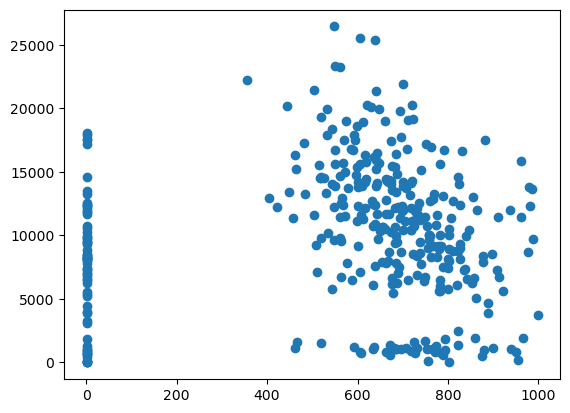

In [44]:
# your answer here
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [45]:
# your answer here
corr = fitbit['MinutesOfSleep'].corr(fitbit['Steps'])
corr

0.1309856595083638

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

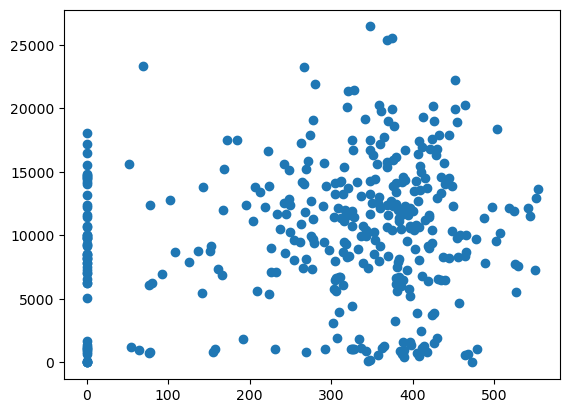

In [46]:
# your answer here
plt.scatter(fitbit['MinutesOfSleep'], fitbit['Steps'])

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [57]:
# your answer here
cor_fit= fitbit.corr()


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

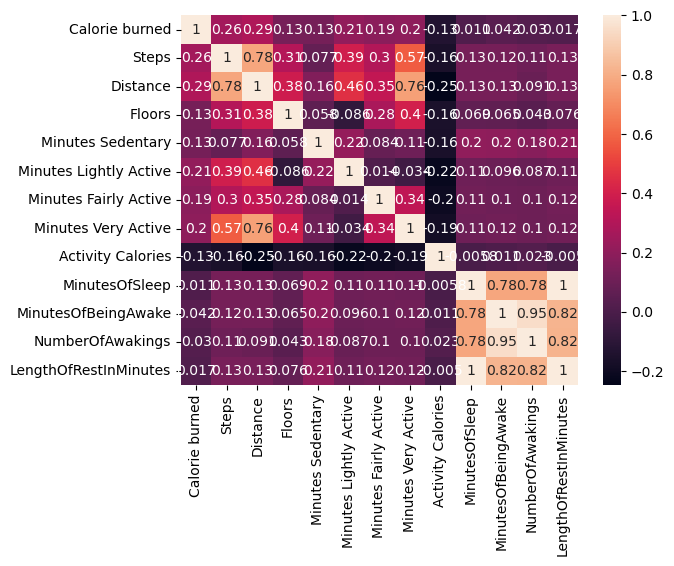

In [58]:
# your answer here
sn.heatmap(cor_fit, annot=True)
plt.show()

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [64]:
# your answer here
time_grades = pd.read_csv('Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

Text(0.5, 1.0, 'Time Distribution')

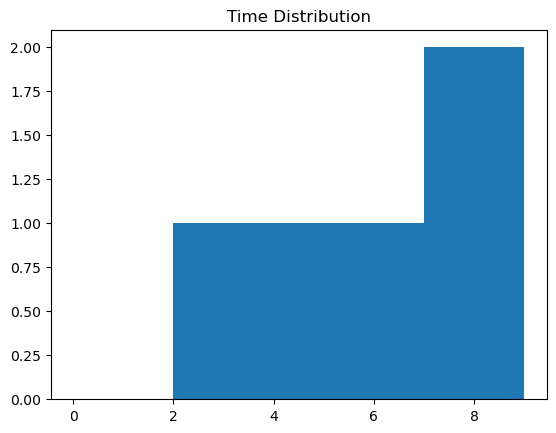

In [68]:
# your answer here
plt.hist(time_grades['Study time'], bins=range(10))
plt.title('Time Distribution')

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [72]:
# your answer here
pearson_corr, pearson_p = pearsonr(time_grades['Study time'], time_grades['Grade'])
print("Pearson correlation coefficient: ", pearson_corr)


spearman_corr, spearman_p = spearmanr(time_grades['Study time'], time_grades['Grade'])
print("Spearman correlation coefficient: ", spearman_corr)


Pearson correlation coefficient:  0.7980456073578857
Spearman correlation coefficient:  0.819658753036942


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

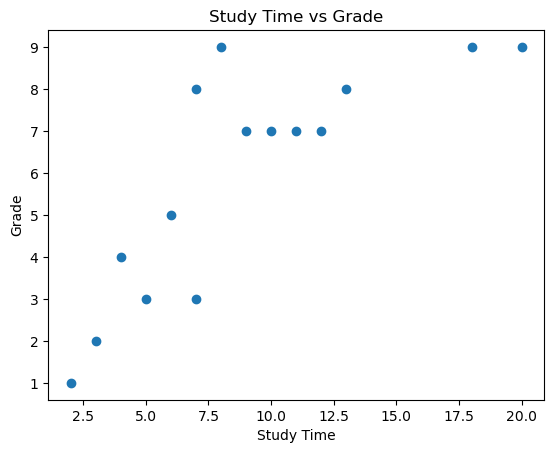

In [73]:
# your answer here
plt.scatter(time_grades['Study time'], time_grades['Grade'])
plt.title('Study Time vs Grade')
plt.xlabel('Study Time')
plt.ylabel('Grade')
plt.show()

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# your answer here
# Pearson correlation assumes that the relationship between the two variables is linear
# Spearman correlation  does not assume that the relationship between the variables is linear, but rather that it can be expressed as a monotonic function